## Task 1

### 1. Suppose you have a deck of cards containing 52 cards, with 13 cards in each suit (hearts, 
diamonds, clubs, spades). You randomly draw 5 cards from the deck without 
replacement. 

d. Use python coding to demonstrate the same steps.

In [29]:
#Identifying the total number of outcomes.
def factorial(n):
    result = 1
    for i in range(1, n + 1):
        result *= i
    return result

#Total number of outcomes calculation
total_number_outcomes = factorial(52) / (factorial(5) * factorial(52 - 5))
print("The total number of outcomes : ", int(total_number_outcomes))

#Calculating the total number of favorable outcomes.
favorable_outcomes_one_suit = factorial(13) / (factorial(5) * factorial(13 - 5))
print("total number of favorable outcomes for one suit :", int(favorable_outcomes_one_suit))

#Calculation for number of favorable outcomes for four suits
favorable_outcomes_four_suits = favorable_outcomes_one_suit * 4
print("total number of favorable outcomes for 4 suits :", int(favorable_outcomes_four_suits))

#Calulating the probability
probability = favorable_outcomes_four_suits/total_number_outcomes
print("Probaboility of 5 cards being the same suit :", float(probability),"%")

The total number of outcomes :  2598960
total number of favorable outcomes for one suit : 1287
total number of favorable outcomes for 4 suits : 5148
Probaboility of 5 cards being the same suit : 0.0019807923169267707 %


e. Use ‘math’ function in python to do the same.

In [30]:
import math

# Total number of cards (n=52) and the total number of ways Randomly drawn cards (r=5)
total_ways = math.comb(52, 5)

num_suits = 4

# total number of favorable outcomes for 4 suits
num_ways_same_suit = num_suits * math.comb(13, 5)

# Calulating the probability
probability = num_ways_same_suit / total_ways

print("The total number of outcomes :", total_ways)
print("total number of favorable outcomes for 4 suits :", num_ways_same_suit)
print("Probaboility of 5 cards being the same suit :", probability)


The total number of outcomes : 2598960
total number of favorable outcomes for 4 suits : 5148
Probaboility of 5 cards being the same suit : 0.0019807923169267707


### 2. You are the manager of a manufacturing plant that produces light bulbs. You have historical data on the failure rate of your light bulbs, which is 2%. You receive a complaint from a customer who says that their package of 10 light bulbs contained 3 defective bulbs.

i. Define the variables.

In [31]:

n = 10  # Batch size / the number of bulbs in a batch
p = 0.02  # Failure rate and the Probability of a single light bulb being defective
k = 3  # Defective bulb count

ii. Use ‘pmf’ function to calculate the likelihood.

In [32]:
from scipy.stats import binom

# Using the 'pmf' function to calculate the probability that the entire batch is defective
prob_defective = binom.pmf(n, n, p)

print(f"The probability that the entire batch of 10 bulbs is defective: {prob_defective:.17f}")


The probability that the entire batch of 10 bulbs is defective: 0.00000000000000001


iii. Calculate evidence or marginal likelihood. This is the probability of observing the data, regardless of the hypothesis.

In [34]:
import scipy.stats
# Defining the binomial distribution
binom_dist = stats.binom(n, p)

# Calculating the probabilities for each possible number of defective bulbs
probabilities = [binom_dist.pmf(i) for i in range(n+1)]

# Calculating the marginal likelihood (the sum of all these probabilities)
marginal_likelihood = sum(probabilities)

print("The marginal likelihood is:", marginal_likelihood)

The marginal likelihood is: 0.9999999999999996


iv. Calculate the posterior probability distribution using Bayes' theorem.

In [ ]:
posterior_probability = (prob_defective * p) / evidence
print(f"The posterior probability: {posterior_probability:.17f}")


The posterior probability: 0.00000000000002371


3. Consider a dataset with n=50 observations and p=2 predictor variables X1 and X2, and a response variable Y. We want to fit a multiple linear regression model to predict Y based on the predictors.

a. Write a function fit_linear_regression(X, Y) that takes in a matrix X of size n x p representing the predictor variables and a vector Y of length n representing the response variable, and returns the vector of fitted values Y_pred, the vector of residuals residuals, and the vector of estimated coefficients beta using matrix algebra. Your function should also calculate and print the R-squared value for the model.

In [35]:
import numpy as np

def fit_linear_regression(X, Y):
    # Add a column of ones to X for the intercept term
    X = np.column_stack((np.ones(len(X)), X))
    
    # Calculate the estimated coefficients using matrix algebra
    beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
    
    # Calculate the fitted values
    Y_pred = X.dot(beta)
    
    # Calculate the residuals
    residuals = Y - Y_pred
    
    # Calculate the R-squared value
    SSR = np.sum((Y_pred - np.mean(Y))**2)  # Regression sum of squares
    SST = np.sum((Y - np.mean(Y))**2)  # Total sum of squares
    r_squared = SSR / SST
    
    # Print the R-squared value
    print("R-squared:", r_squared)
    
    return Y_pred, residuals, beta


b. Generate a random dataset with n=50 observations and p=2 predictor variables X1 and X2 using the numpy random module. Set Y equal to 5 + 2*X1 - 3*X2 + error, where error is normally distributed with mean 0 and standard deviation 1.

In [36]:
import numpy as np

# Set the random seed for reproducibility
np.random.seed(42)

# Set the number of observations (n) and predictor variables (p)
n = 50
p = 2

# Generate predictor variables X1 and X2
X1 = np.random.randn(n)
X2 = np.random.randn(n)

# Generate error term
error = np.random.randn(n)

# Calculate the response variable Y
Y = 5 + 2*X1 - 3*X2 + error


c. Use your fit_linear_regression() function to fit a multiple linear regression model to the generated dataset.

In [37]:
# Fit the multiple linear regression model
Y_pred, residuals, beta = fit_linear_regression(np.column_stack((X1, X2)), Y)


R-squared: 0.9128119099579354


d. Plot the residuals vs fitted graph using matplotlib.

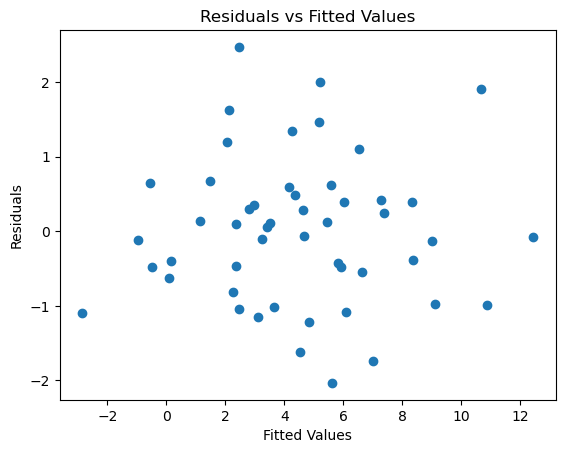

In [38]:
import matplotlib.pyplot as plt

# Plotting the residuals versus the fitted values
plt.scatter(Y_pred, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()
